### Micromobility
The way we travel in urban areas is changing rapidly with the advent of new types of vehicles i.e scooters, electrical bikes and etc. Although these devices can be privately owned, they are mostly owned by shared mobility service companies.
The most important aspects of these latest services is that there are not any docks for picking up and leaving back the devices. Instead, the vehicles can be left anywhere in designated boundaries in the city center.

In Austin, Texas there are 8 mobility companies that provide more than 15000 scooters and 2000 e-bikes. Austin Transportation provides the dockless vehicle trips dataset records trips taken in the city which can be interesting to explore. Let's explore the following questions:

### Questions we wanna address:
1. When are these devices generally used?
2. Where are these devices generally picked up and left?
3. What is the average distance per trip?
4. What is the average duration per trip?
5. What are the factors that influence the trip distance and duration? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, HTML, display_html
import seaborn as sns
sns.set()
import datetime

Load the mobility dataset

In [20]:
# set formatting
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# read in CSV file data
df = pd.read_csv('Dockless_Vehicle_Trips.csv')
df = df[(df.loc[:,'Month'] >= 1) & 
        (df.loc[:, 'Month'] <= 12)]

# ((df.loc[:,'Year'] == 2018) &
# (df.loc[:,'Year'] == 2019) &

/home/jupiter/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Several properties of the data:
1. What are the columns?
2. How many rows and columns
3. What are the data types
4. Are there any null values, incomplete values
5. What are some other caveats to the data?

In [3]:
# look at the data
display(df.head())

# shape of the data
display(df.shape)

# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:].dtypes)

# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:,:].isnull().any())

# display descriptive statistics
# Trip Distance and Trip Duration percentiles
display(df.iloc[:,3:5].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.85, 0.95, 0.98, 0.99]))

# display the columns
display(df.columns.values)

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,bicycle,11491603.0,1658.0,11/30/2018 11:00:00 AM,04/12/2019 12:00:00 PM,12/21/2018 12:41:42 AM,11.0,11.0,5.0,9.0,0.0,2018.0,NaN,NaN
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,scooter,678.0,2785.0,04/27/2019 03:00:00 PM,04/27/2019 03:15:00 PM,04/28/2019 02:42:07 AM,4.0,15.0,6.0,1.0,9.0,2019.0,48453001100,4.8453e+10
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,scooter,713.0,2466.0,04/27/2019 03:00:00 PM,04/27/2019 03:15:00 PM,04/28/2019 02:42:07 AM,4.0,15.0,6.0,9.0,5.0,2019.0,48453001305,4.8453e+10
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,scooter,469.0,1608.0,04/27/2019 03:15:00 PM,04/27/2019 03:15:00 PM,04/28/2019 02:42:07 AM,4.0,15.0,6.0,9.0,9.0,2019.0,48453001100,4.8453e+10
5,23787175-efa2-46db-9ba6-9d53f9eabd64,672b17a6-6916-4f4e-a4e4-8168d623f638,scooter,644.0,1326.0,04/27/2019 03:15:00 PM,04/27/2019 03:15:00 PM,04/28/2019 02:42:07 AM,4.0,15.0,6.0,9.0,9.0,2019.0,48453001305,4.8453e+10


(6063935, 16)

ID                           object
Device ID                    object
Vehicle Type                 object
Trip Duration               float64
Trip Distance               float64
Start Time                   object
End Time                     object
Modified Date                object
Month                       float64
Hour                        float64
Day of Week                 float64
Council District (Start)    float64
Council District (End)      float64
Year                        float64
Census Tract Start           object
Census Tract End             object
dtype: object

ID                          False
Device ID                   False
Vehicle Type                False
Trip Duration               False
Trip Distance               False
Start Time                  False
End Time                    False
Modified Date               False
Month                       False
Hour                        False
Day of Week                 False
Council District (Start)     True
Council District (End)       True
Year                        False
Census Tract Start           True
Census Tract End             True
dtype: bool

,Trip Duration,Trip Distance
count,6.063935e+06,6.063935e+06
mean,6.761442e+02,2.851972e+04
std,5.076165e+03,7.016186e+06
min,-8.616100e+04,-1.672411e+07
1%,2.200000e+01,0.000000e+00
5%,8.100000e+01,0.000000e+00
25%,2.310000e+02,4.390000e+02
50%,4.050000e+02,9.810000e+02
75%,7.620000e+02,1.869000e+03
85%,1.095000e+03,2.635000e+03


array(['ID', 'Device ID', 'Vehicle Type', 'Trip Duration',
       'Trip Distance', 'Start Time', 'End Time', 'Modified Date',
       'Month', 'Hour', 'Day of Week', 'Council District (Start)',
       'Council District (End)', 'Year', 'Census Tract Start',
       'Census Tract End'], dtype=object)

## Cleaning
1. Drop unwanted columns
2. Remove rows with NaNs
3. Drop duplicates (optional)
4. Remove unwanted columns
5. Remove negative trip duration
6. Remove negative trip distances
7. Check other types 

In [4]:
# Drop unwanted columns
columns_to_drop = ['Census Tract Start', 'Census Tract End', 'End Time']
df.drop(columns_to_drop, axis=1, inplace=True)

# remove the NaN rows 
df.dropna(axis='rows', how='any', inplace=True)

# drop the duplicates
#df.drop_duplicates()

# remove the extreme values
df = df[df.iloc[:, 3] < np.percentile(df.iloc[:,3], 99)]
df = df[df.iloc[:, 3] > np.percentile(df.iloc[:,3], 1)]
df = df[df.iloc[:, 4] < np.percentile(df.iloc[:,4], 99)]
df = df[df.iloc[:, 4] > np.percentile(df.iloc[:,4], 1)]

# Check Vehicle Types
display(df.iloc[:, 2].unique())

# Check districts
display(df.iloc[:, 11].unique())
display(df.iloc[:, 12].unique())



array(['scooter', 'bicycle'], dtype=object)

array([ 9.,  5.,  1.,  3.,  8., 10.,  7.,  0.,  4.,  2.,  6.])

array([2019., 2018.])

## Processing
1. Rename columns for easier processing
2. Remove rows that has zero trip distance and duration
3. Log transform trip distance and trip duration for exploratory analysis
4. Day of Week: Sunday 0 ... Saturday 6
5. Month: January 0 ... December 11

m,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,9.053425,9.313304,9.885676,9.682535,9.678521,9.588243,9.606039,8.735366,8.867531,9.031253,9.064354,9.039593
std,1.191966,1.150142,1.263864,1.168000,1.094121,1.126926,1.113013,1.509272,1.441940,1.407079,1.332633,1.184618
min,6.431336,6.621411,7.310555,7.083393,7.221110,7.018407,7.044910,5.693737,6.184154,6.327942,6.322570,6.633323
25%,8.436826,8.759197,9.161139,9.049485,9.127811,9.035664,9.076726,7.430156,7.484294,7.702171,8.102512,8.283853
50%,9.365369,9.781798,10.333115,10.105678,10.145701,10.078038,10.007451,9.241002,9.434771,9.635452,9.566707,9.328564
75%,10.106064,10.262745,10.900879,10.616507,10.498737,10.418487,10.439632,10.082694,10.207658,10.300065,10.251441,10.064641
max,10.388416,10.483107,11.172930,10.729618,10.683849,10.568086,10.583276,10.158367,10.290250,10.463708,10.400868,10.299648


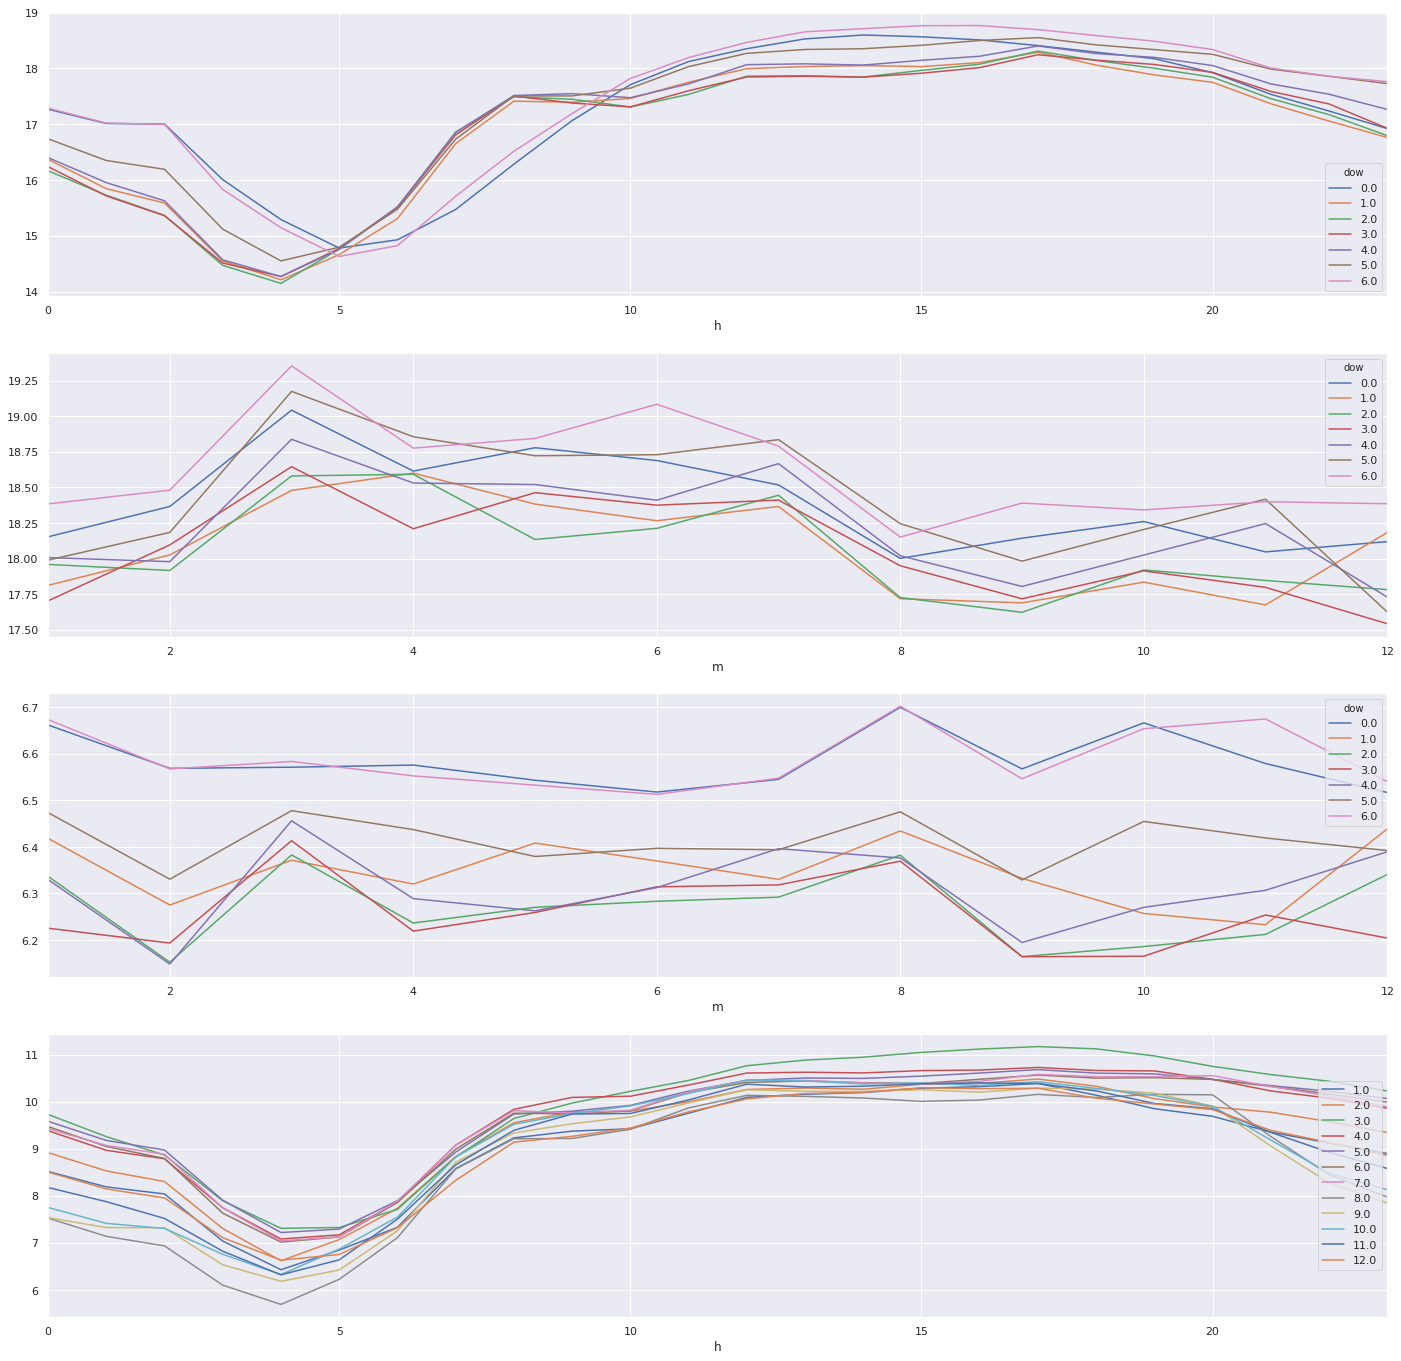

In [18]:
# Rename columns
df_example = df.rename(columns = {'Day of Week':'dow','Start Time': 'st', 'Hour': 'h', 'Month': 'm',
                                  'Vehicle Type': 'vt', 'Trip Distance': 'tdis', 'Trip Duration': 'tdur',
                                 'Council District (Start)':'scd', 'Council District (End)':'ecd'})

# more than one second
df = df[df.iloc[:, 3] > 0] 
df = df[df.iloc[:, 4] > 0]

# Group data by number of listings per date
fig, ax = plt.subplots(4, figsize=(24, 24))
display(df_example.groupby(['h','m']).count()['tdis'].unstack().apply(lambda x: np.log(x)+0.000005).describe())
df_example.groupby(['h','dow']).sum()['tdis'].apply(lambda x: np.log(x)+0.000005).unstack().plot(ax=ax[0])
df_example.groupby(['m','dow']).sum()['tdis'].apply(lambda x: np.log(x)+0.000005).unstack().plot(ax=ax[1])
df_example.groupby(['m','dow']).mean()['tdur'].unstack().apply(lambda x: np.log(x)+0.000005).plot(ax=ax[2])
df_example.groupby(['h','m']).count()['tdis'].unstack().apply(lambda x: np.log(x)+0.000005).plot(ax=ax[3]).legend(loc='right')
#df_example.groupby(['h','dow']).sum()['tdur'].unstack().apply(lambda x: np.log(x)+0.000005).plot(ax=ax[2])
#df_example.groupby(['h','m']).sum()['tdur'].unstack().apply(lambda x: np.log(x)+0.000005).plot(ax=ax[3])